<a href="https://colab.research.google.com/github/Sohaib-50/German-Traffic-Sign-Recognition/blob/main/German_Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis And Preprocessing




In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!wget -c https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip  -P /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset
!unzip /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB_Final_Training_Images.zip -d /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: /content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Tr

In [1]:
!dir drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images
!ls -l /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images | grep -c '^d'


00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039
43


In [ ]:

!ls -l /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB


total 7
drwx------ 3 root root 4096 May 13 07:45 Final_Training
-rw------- 1 root root 2572 Dec  1  2010 Readme-Images.txt


## Understanding The Dataset

In [ ]:
!dir drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00000

00000_00000.ppm  00001_00023.ppm  00003_00016.ppm  00005_00009.ppm
00000_00001.ppm  00001_00024.ppm  00003_00017.ppm  00005_00010.ppm
00000_00002.ppm  00001_00025.ppm  00003_00018.ppm  00005_00011.ppm
00000_00003.ppm  00001_00026.ppm  00003_00019.ppm  00005_00012.ppm
00000_00004.ppm  00001_00027.ppm  00003_00020.ppm  00005_00013.ppm
00000_00005.ppm  00001_00028.ppm  00003_00021.ppm  00005_00014.ppm
00000_00006.ppm  00001_00029.ppm  00003_00022.ppm  00005_00015.ppm
00000_00007.ppm  00002_00000.ppm  00003_00023.ppm  00005_00016.ppm
00000_00008.ppm  00002_00001.ppm  00003_00024.ppm  00005_00017.ppm
00000_00009.ppm  00002_00002.ppm  00003_00025.ppm  00005_00018.ppm
00000_00010.ppm  00002_00003.ppm  00003_00026.ppm  00005_00019.ppm
00000_00011.ppm  00002_00004.ppm  00003_00027.ppm  00005_00020.ppm
00000_00012.ppm  00002_00005.ppm  00003_00028.ppm  00005_00021.ppm
00000_00013.ppm  00002_00006.ppm  00003_00029.ppm  00005_00022.ppm
00000_00014.ppm  00002_00007.ppm  00004_00000.ppm  00005_00023

<i> Each folder has images for that class (with .ppm extension) and a csv file with annotation information </i>

### Showing some random images from first class

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import cv2

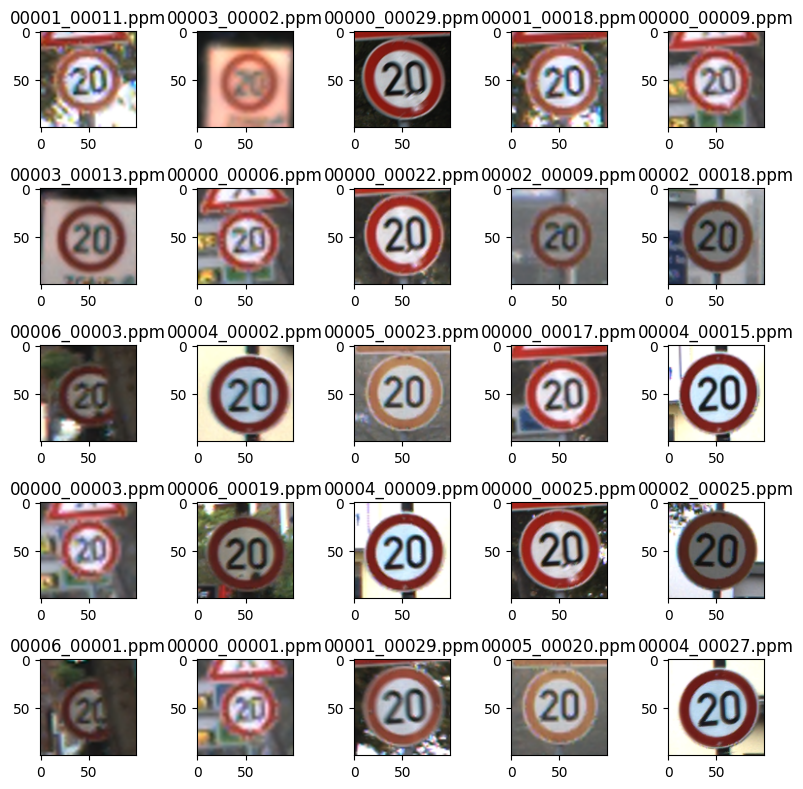

In [ ]:
# Set the path to the folder containing the images
folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/00000"

# Set the number of rows and columns in the grid
rows = 5
cols = 5

# Get a list of image file names from the folder
file_names = os.listdir(folder_path)

# Filter the list to include only image files
file_names = [f for f in file_names if f.endswith(".ppm")]

# Shuffle the list of file names
np.random.shuffle(file_names)

# Select the first rows * cols file names
file_names = file_names[:rows * cols]

# Create a new figure with a size of 8x8 inches
figure(figsize=(8, 8))

# Loop over the file names and load and display each image in a subplot
for i, file_name in enumerate(file_names):
    # Load the image using PIL
    img = Image.open(os.path.join(folder_path, file_name))
    
    # Resize the image to 100x100 pixels
    img = img.resize((100, 100))
    
    # Add the image to a subplot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    
    # Add the file name as a title
    plt.title(file_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

### Understanding content of annotation CSV file

In [ ]:
import csv

In [ ]:
class_name = "00010"
csv_file_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_name}/GT-{class_name}.csv"

print("First 5 rows:")
with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    i = 0
    for row in csv_reader:
        print(row)
        i += 1
        if i == 5:
          break


First 5 rows:
['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
['00000_00000.ppm', '37', '37', '6', '5', '32', '32', '10']
['00000_00001.ppm', '35', '37', '5', '6', '30', '32', '10']
['00000_00002.ppm', '36', '36', '6', '5', '31', '31', '10']
['00000_00003.ppm', '37', '39', '5', '6', '32', '34', '10']


### Viewing One Image From Each Class

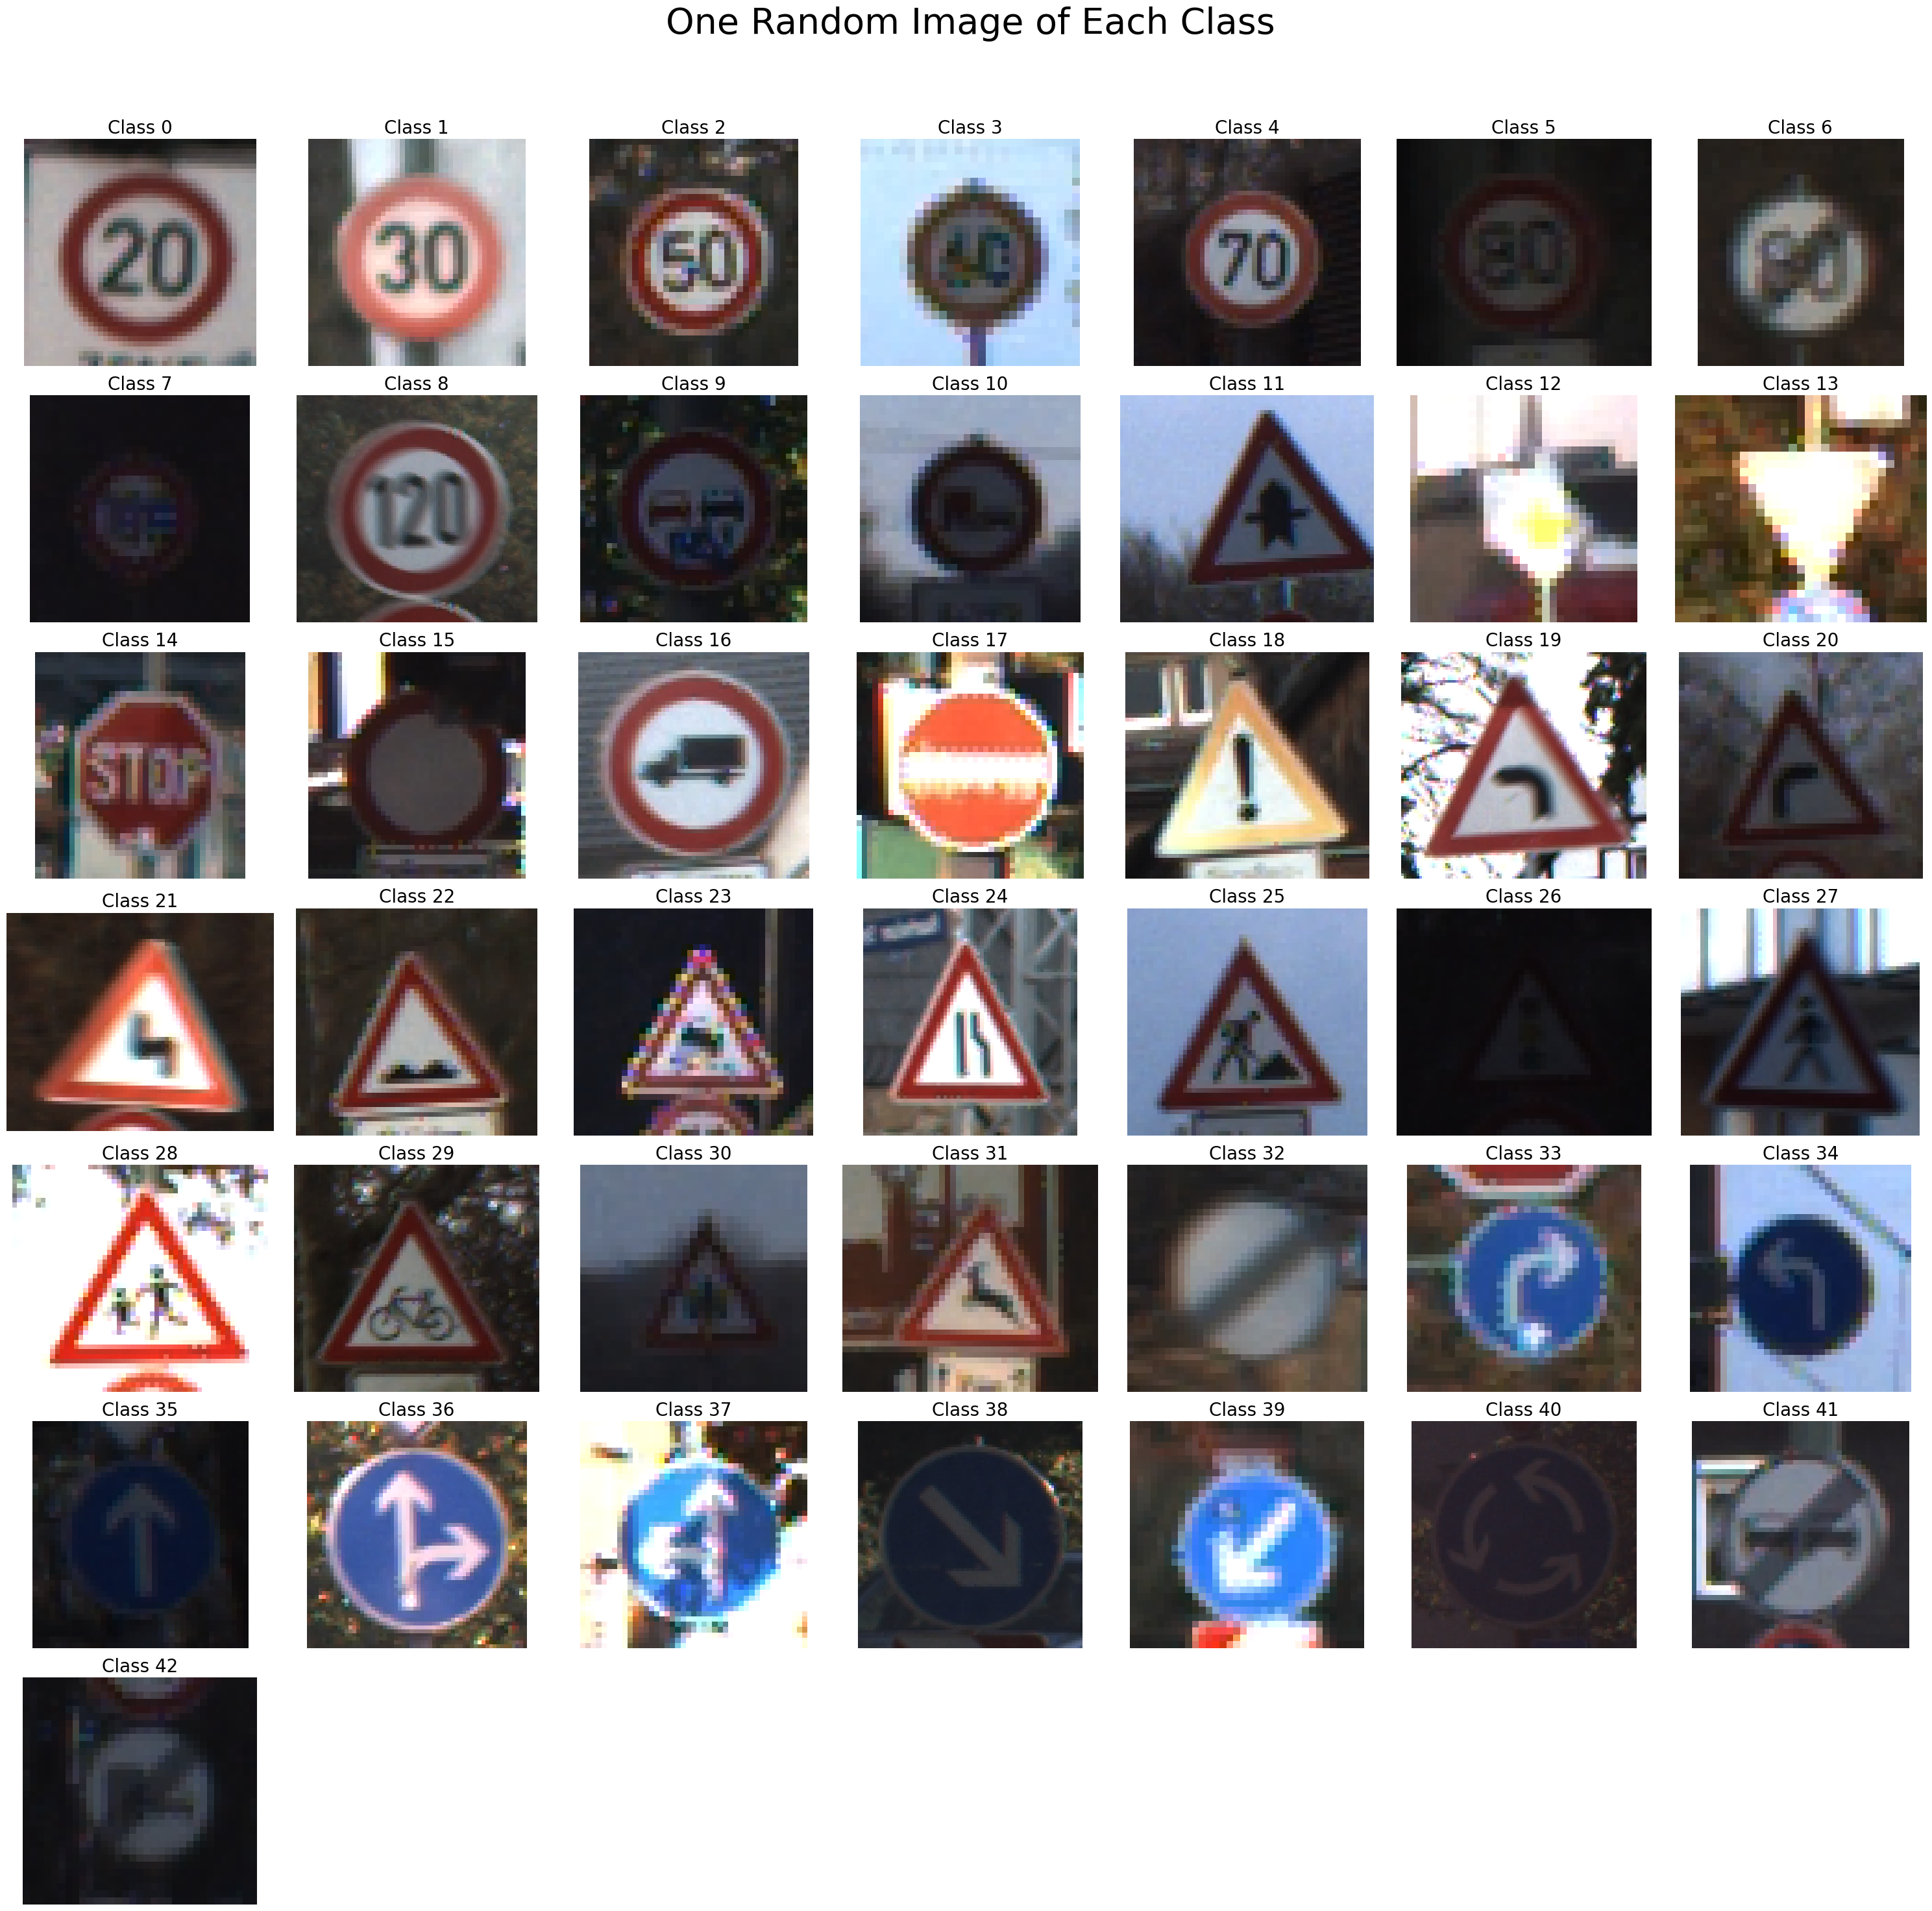

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

data_dir = '/content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images'
classes = 43
class_names = []
for i in range(classes):
    class_names.append(f'{i:05}')

plt.figure(figsize=(30, 30))
plt.suptitle("One Random Image of Each Class", fontsize=40)

for i in range(classes):
    path = os.path.join(data_dir, class_names[i])
    images = os.listdir(path)
    ax = plt.subplot(7, 7, i+1)
    ax.set_title(f"Class {i}", fontsize=20)
    plt.imshow(Image.open(os.path.join(path, images[random.randint(0, len(images)-1)])))
    plt.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
            image_files_count += 1
    print(f"Number of image files = {image_files_count}")


> class 0: Number of image files = 210
> class 1: Number of image files = 2220
> class 2: Number of image files = 2250
> class 3: Number of image files = 1410
> class 4: Number of image files = 1980
> class 5: Number of image files = 1860
> class 6: Number of image files = 420
> class 7: Number of image files = 1440
> class 8: Number of image files = 1410
> class 9: Number of image files = 1470
> class 10: Number of image files = 2010
> class 11: Number of image files = 1320
> class 12: Number of image files = 2100
> class 13: Number of image files = 2160
> class 14: Number of image files = 780
> class 15: Number of image files = 630
> class 16: Number of image files = 420
> class 17: Number of image files = 1096
> class 18: Number of image files = 1187
> class 19: Number of image files = 204
> class 20: Number of image files = 360
> class 21: Number of image files = 330
> class 22: Number of image files = 390
> class 23: Number of image files = 510
> class 24: Number of image files = 

In [ ]:
import cv2

In [ ]:
images_sizes = []
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
          image_path = os.path.join(folder_path, file_name)
          img = cv2.imread(image_path)
          h, w, c = img.shape
          images_sizes.append((h, w))

> class 0: > class 1: > class 2: > class 3: > class 4: > class 5: > class 6: > class 7: > class 8: > class 9: > class 10: > class 11: > class 12: > class 13: > class 14: > class 15: > class 16: > class 17: > class 18: > class 19: > class 20: > class 21: > class 22: > class 23: > class 24: > class 25: > class 26: > class 27: > class 28: > class 29: > class 30: > class 31: > class 32: > class 33: > class 34: > class 35: > class 36: > class 37: > class 38: > class 39: > class 40: > class 41: > class 42: 

In [ ]:
print(f"Total images: {len(images_sizes)}")
print(f"Largest image size: {max(images_sizes)}")
print(f"Smallest image size: {min(images_sizes)}")
avg_h = sum([x[0] for x in images_sizes])/len(images_sizes)
avg_w = sum([x[1] for x in images_sizes])/len(images_sizes)
print(f"Average image size: ({avg_h:.2f}, {avg_w:.2f})")

Total images: 39162
Largest image size: (225, 243)
Smallest image size: (25, 25)
Average image size: (50.34, 50.85)


## Cropping Images
First going to try cropping logic on few images from 00000 folder (1st class)

In [ ]:
import random
import pandas as pd
import cv2

Cropping 00005_00007.ppm
width: 33, height: 30, x1: 6, y1: 5, x2: 28, y2: 25, class_id: 0


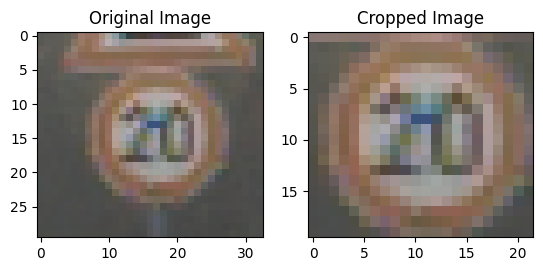

Cropping 00002_00002.ppm
width: 27, height: 28, x1: 5, y1: 6, x2: 22, y2: 23, class_id: 0


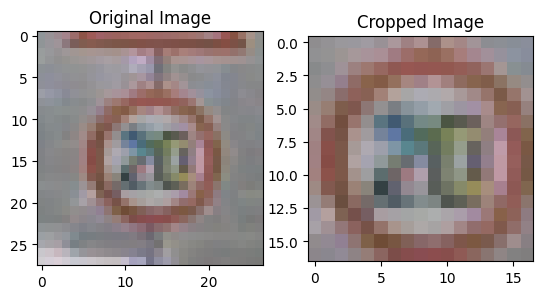

Cropping 00004_00014.ppm
width: 70, height: 74, x1: 7, y1: 7, x2: 64, y2: 68, class_id: 0


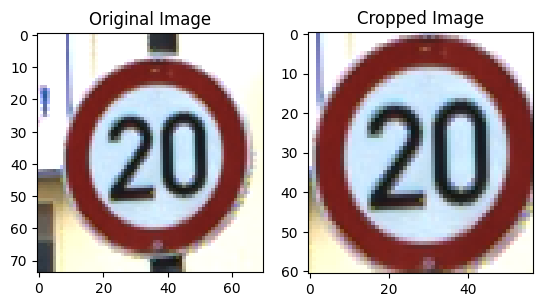

Cropping 00004_00015.ppm
width: 72, height: 75, x1: 7, y1: 6, x2: 65, y2: 68, class_id: 0


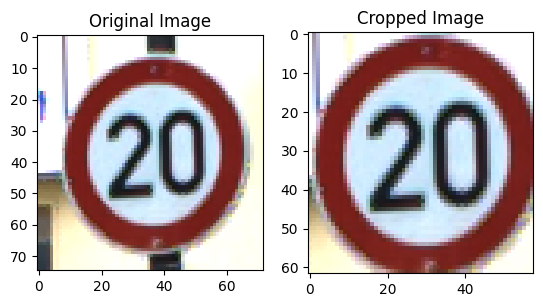

Cropping 00000_00017.ppm
width: 47, height: 48, x1: 6, y1: 6, x2: 42, y2: 42, class_id: 0


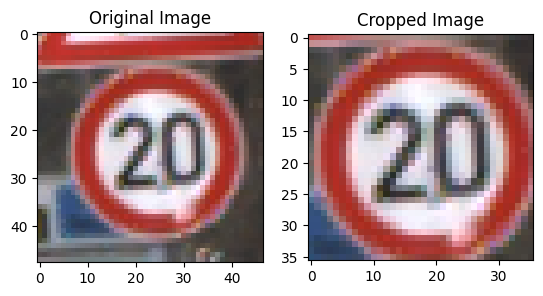

In [ ]:
class_number = "00000"
n_files_to_load = 5
folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_number}"
image_file_names = random.sample([f for f in os.listdir(folder_path) if f.endswith(".ppm")], n_files_to_load)  # Get a list of n_files_to_load random image file names from the folder
csv_content = pd.read_csv(f"{folder_path}/GT-{class_number}.csv", delimiter=";")  # Load annotation information

for file_name in image_file_names:
  print(f"Cropping {file_name}")
  row = csv_content.loc[csv_content['Filename'] == file_name]
  filename, width, height, x1, y1, x2, y2, class_id = row.values[0]
  print(f"width: {width}, height: {height}, x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}, class_id: {class_id}")
  
  image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, file_name)), cv2.COLOR_BGR2RGB) # load and convert image

  # crop image
  x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
  cropped_image = image[y1:y2, x1:x2]

  # Display original and cropped images side by side
  fig, axs = plt.subplots(ncols=2)
  axs[0].imshow(image)
  axs[0].set_title('Original Image')
  axs[1].imshow(cropped_image)
  axs[1].set_title('Cropped Image')
  plt.show()


<i> Seems to work </i>

### Cropping all images of dataset 

In [ ]:
# Create the directory to store the cropped images
os.makedirs("./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped", exist_ok=True)

for class_id in range(0, 43):
    print(f"> Cropping images for class {class_id}.")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"
    os.makedirs(f"{folder_path}_Cropped") # Create a new directory for the cropped images
    
    csv_content = pd.read_csv(f"{folder_path}/GT-{class_id:05}.csv", delimiter=";")  # Load annotation information

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
            row = csv_content.loc[csv_content['Filename'] == file_name]
            filename, width, height, x1, y1, x2, y2, class_id = row.values[0]

            image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, file_name)), cv2.COLOR_BGR2RGB) # load and convert image

            # crop image
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cropped_image = image[y1:y2, x1:x2]

            # Save cropped image to the new directory
            cv2.imwrite(os.path.join(f"{folder_path}_Cropped", file_name), cropped_image)

print("Done cropping images!")

> Cropping images for class 0.
> Cropping images for class 1.
> Cropping images for class 2.
> Cropping images for class 3.
> Cropping images for class 4.
> Cropping images for class 5.
> Cropping images for class 6.
> Cropping images for class 7.
> Cropping images for class 8.
> Cropping images for class 9.
> Cropping images for class 10.
> Cropping images for class 11.
> Cropping images for class 12.
> Cropping images for class 13.
> Cropping images for class 14.
> Cropping images for class 15.
> Cropping images for class 16.
> Cropping images for class 17.
> Cropping images for class 18.
> Cropping images for class 19.
> Cropping images for class 20.
> Cropping images for class 21.
> Cropping images for class 22.
> Cropping images for class 23.
> Cropping images for class 24.
> Cropping images for class 25.
> Cropping images for class 26.
> Cropping images for class 27.
> Cropping images for class 28.
> Cropping images for class 29.
> Cropping images for class 30.
> Cropping images 

In [ ]:
import shutil

for class_id in range(0, 43):
    print(f"> Moving cropped images for class {class_id}.")
    source_dir = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}_Cropped"
    dest_dir = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped/{class_id:05}"
    
    # Create the destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)
    
    # Move all images from the source directory to the destination directory
    for file_name in os.listdir(source_dir):
        shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))
    
    # Remove the now empty source directory
    os.rmdir(source_dir)

print("Done moving images!")


> Moving cropped images for class 0.
> Moving cropped images for class 1.
> Moving cropped images for class 2.
> Moving cropped images for class 3.
> Moving cropped images for class 4.
> Moving cropped images for class 5.
> Moving cropped images for class 6.
> Moving cropped images for class 7.
> Moving cropped images for class 8.
> Moving cropped images for class 9.
> Moving cropped images for class 10.
> Moving cropped images for class 11.
> Moving cropped images for class 12.
> Moving cropped images for class 13.
> Moving cropped images for class 14.
> Moving cropped images for class 15.
> Moving cropped images for class 16.
> Moving cropped images for class 17.
> Moving cropped images for class 18.
> Moving cropped images for class 19.
> Moving cropped images for class 20.
> Moving cropped images for class 21.
> Moving cropped images for class 22.
> Moving cropped images for class 23.
> Moving cropped images for class 24.
> Moving cropped images for class 25.
> Moving cropped image

In [ ]:
images_sizes = []
for class_id in range(0, 43):
    print(f"> class {class_id}:", end=" ")
    folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped/{class_id:05}"

    image_files_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ppm"):
          image_path = os.path.join(folder_path, file_name)
          img = cv2.imread(image_path)
          h, w, c = img.shape
          images_sizes.append((h, w))

> class 0: > class 1: > class 2: > class 3: > class 4: > class 5: > class 6: > class 7: > class 8: > class 9: > class 10: > class 11: > class 12: > class 13: > class 14: > class 15: > class 16: > class 17: > class 18: > class 19: > class 20: > class 21: > class 22: > class 23: > class 24: > class 25: > class 26: > class 27: > class 28: > class 29: > class 30: > class 31: > class 32: > class 33: > class 34: > class 35: > class 36: > class 37: > class 38: > class 39: > class 40: > class 41: > class 42: 

In [ ]:
print(f"Total images: {len(images_sizes)}")
print(f"Largest image size: {max(images_sizes)}")
print(f"Smallest image size: {min(images_sizes)}")
avg_h = sum([x[0] for x in images_sizes])/len(images_sizes)
avg_w = sum([x[1] for x in images_sizes])/len(images_sizes)
print(f"Average image size: ({avg_h:.2f}, {avg_w:.2f})")

Total images: 39061
Largest image size: (185, 203)
Smallest image size: (15, 15)
Average image size: (38.79, 39.21)


In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


# Loading Dataset

In [ ]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split


### Loading images and labels from folders

In [ ]:
# Define the path to the dataset directory
dataset_dir = './drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped'

# Define empty lists to store the image data and corresponding labels
images = []
labels = []

# Load dataset
print("Loading dataset")
for class_id in range(43):
    class_dir = os.path.join(dataset_dir, f'{class_id:05}')
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        images.append(image)
        labels.append(class_id)
    print(f"Class {class_id} images loaded.")

Loading dataset
Class 0 images loaded.
Class 1 images loaded.
Class 2 images loaded.
Class 3 images loaded.
Class 4 images loaded.
Class 5 images loaded.
Class 6 images loaded.
Class 7 images loaded.
Class 8 images loaded.
Class 9 images loaded.
Class 10 images loaded.
Class 11 images loaded.
Class 12 images loaded.
Class 13 images loaded.
Class 14 images loaded.
Class 15 images loaded.
Class 16 images loaded.
Class 17 images loaded.
Class 18 images loaded.
Class 19 images loaded.
Class 20 images loaded.
Class 21 images loaded.
Class 22 images loaded.
Class 23 images loaded.
Class 24 images loaded.
Class 25 images loaded.
Class 26 images loaded.
Class 27 images loaded.
Class 28 images loaded.
Class 29 images loaded.
Class 30 images loaded.
Class 31 images loaded.
Class 32 images loaded.
Class 33 images loaded.
Class 34 images loaded.
Class 35 images loaded.
Class 36 images loaded.
Class 37 images loaded.
Class 38 images loaded.
Class 39 images loaded.
Class 40 images loaded.
Class 41 i

### Resizing all to 48x48

In [ ]:
for idx, image in enumerate(images):
    images[idx] = image.resize((48, 48))

### Converting images from PIL objects to numeric form, normalizing ([0, 255] -> [0, 1]), and converting images and labels list to np array

In [ ]:
import numpy as np

# Convert images to numpy arrays
images = np.array([np.array(img) for img in images])

# Normalize the pixel values
images = images / 255.0

labels = np.array(labels)

### Split data into training and testing sets

In [ ]:
train_images, valid_images, train_labels, valid_labels = train_test_split(
    images, labels, train_size=0.8, stratify=labels, random_state=42
)

print(f"Number of train images: {len(train_images)}")
print(f"Number of train labels: {len(train_labels)}")
print(f"Number of valid images: {len(valid_images)}")
print(f"Number of valid labels: {len(valid_labels)}")

Number of train images: 31248
Number of train labels: 31248
Number of valid images: 7813
Number of valid labels: 7813


In [ ]:
type(train_images), type( train_images[0])

(numpy.ndarray, numpy.ndarray)

## One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=43)
valid_labels = to_categorical(valid_labels, num_classes=43)

In [ ]:
train_images.shape, train_labels.shape, valid_images.shape, valid_labels.shape

((31248, 48, 48, 3), (31248, 43), (7813, 48, 48, 3), (7813, 43))

# Modelling

1. Introduction to CNNs:

CNNs are a type of deep learning neural network commonly used for analyzing visual data, such as images.
They are designed to automatically and adaptively learn hierarchical representations of features from raw data.
CNNs have achieved significant success in various computer vision tasks, including image classification, object detection, and image segmentation.
2. Convolutional Layers:

Convolutional layers are the core building blocks of CNNs.
They apply convolution operations to input images to extract local patterns and features.
Each convolutional layer consists of a set of learnable filters or kernels.
The filters convolve across the input image, performing element-wise multiplication and summation, resulting in feature maps that capture spatial patterns.
3. Pooling Layers:

Pooling layers are used to downsample feature maps and reduce their spatial dimensions.
Common pooling operations include max pooling and average pooling.
Pooling helps to reduce the computational complexity of the network and make it more robust to spatial translations.
4. Activation Functions:

Activation functions introduce non-linearity into the network, allowing the model to learn complex relationships.
Common activation functions used in CNNs include ReLU (Rectified Linear Unit), sigmoid, and tanh.
ReLU is the most widely used activation function in CNNs due to its computational efficiency and ability to handle the vanishing gradient problem.
5. Fully Connected Layers:

Fully connected layers are used at the end of the CNN architecture to make predictions based on the extracted features.
These layers connect every neuron from the previous layer to every neuron in the current layer.
They transform the high-level features learned by the convolutional layers into class probabilities or regression values.
6. Loss Functions:

Loss functions measure the difference between predicted outputs and the ground truth labels.
For image classification tasks, the cross-entropy loss function is commonly used.
The goal is to minimize the loss by adjusting the network's parameters during the training process.
7. Optimization and Backpropagation:

Optimization algorithms, such as stochastic gradient descent (SGD) or its variants, are used to update the network's parameters based on the computed gradients.
Backpropagation is a technique for efficiently computing the gradients of the loss with respect to the network's parameters.
The gradients are propagated backward through the network, allowing the model to learn from the errors and adjust the weights accordingly.
8. Training and Evaluation:

CNN models are trained on labeled datasets, where the input images are paired with corresponding ground truth labels.
The dataset is split into training, validation, and testing sets.
The model is trained on the training set, and the performance is evaluated on the validation set.
Hyperparameter tuning and model selection are based on the validation set's performance.
Finally, the model's accuracy is assessed on the testing set to evaluate its generalization ability.

Here's an example of a simple CNN architecture that you can use to get started:

Input Layer: The input layer receives the input images. In this example, we will assume the input images are resized to 48x48 pixels with 3 color channels (RGB).

Convolutional Layers:

Convolutional Layer 1: Apply a convolutional layer with 32 filters, each of size 3x3, and a ReLU activation function.
Max Pooling Layer 1: Perform max pooling with a pool size of 2x2.
Convolutional Layer 2: Apply a convolutional layer with 64 filters, each of size 3x3, and a ReLU activation function.
Max Pooling Layer 2: Perform max pooling with a pool size of 2x2.
Flattening: Flatten the output from the previous layer into a 1D vector to be fed into the fully connected layers.

Fully Connected Layers:

Fully Connected Layer 1: Apply a fully connected layer with 128 neurons and a ReLU activation function.
Fully Connected Layer 2: Apply a fully connected layer with the number of neurons corresponding to the number of output classes (43 for your traffic sign classification task). Use a softmax activation function to obtain class probabilities.
Output Layer: The output layer provides the final class probabilities for the input images.

Training and Optimization:

Use a suitable loss function, such as categorical cross-entropy, to measure the difference between predicted and actual labels.
Choose an optimizer, such as stochastic gradient descent (SGD) or Adam, to update the network's parameters based on the computed gradients.
During training, adjust the weights of the network using backpropagation and gradient descent to minimize the loss.
Remember that this is a simple starting point, and there are numerous variations and enhancements you can make to improve the model's performance. You can experiment with different network architectures, activation functions, optimization algorithms, and hyperparameters to find the best configuration for your specific task.

Additionally, keep in mind that deeper and more complex networks may require more computational resources and longer training times. It's often a good practice to start with a simpler architecture and gradually increase the complexity as needed.

I hope this helps you get started with your CNN implementation. Good luck with your project, and feel free to ask if you have any further questions!

## Creating Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

# Define the CNN model
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Training Model

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=10, batch_size=32)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(valid_images, valid_labels)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/10
977/977 [==============================] - 113s 115ms/step - loss: 3.5030 - accuracy: 0.0523 - val_loss: 3.4918 - val_accuracy: 0.0543
Epoch 2/10
977/977 [==============================] - 105s 108ms/step - loss: 3.4943 - accuracy: 0.0557 - val_loss: 3.4922 - val_accuracy: 0.0538
Epoch 3/10
977/977 [==============================] - 105s 107ms/step - loss: 3.4940 - accuracy: 0.0547 - val_loss: 3.4899 - val_accuracy: 0.0506
Epoch 4/10
977/977 [==============================] - 106s 108ms/step - loss: 3.4929 - accuracy: 0.0551 - val_loss: 3.4929 - val_accuracy: 0.0506
Epoch 5/10
977/977 [==============================] - 109s 112ms/step - loss: 3.4913 - accuracy: 0.0547 - val_loss: 3.4883 - val_accuracy: 0.0576
Epoch 6/10
977/977 [==============================] - 105s 107ms/step - loss: 3.4902 - accuracy: 0.0569 - val_loss: 3.4875 - val_accuracy: 0.0576
Epoch 7/10
977/977 [==============================] - 109s 112ms/step - loss: 3.4894 - accuracy: 0.0561 - val_loss: 3.4888 -

## Visualizing Training Metrics

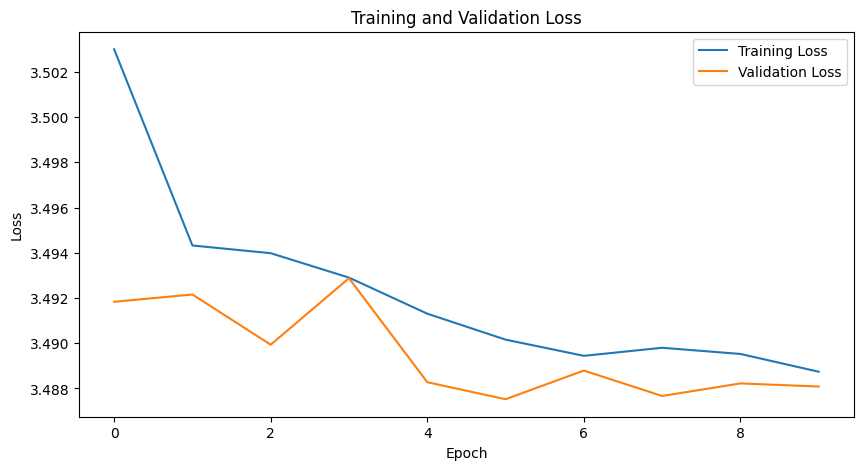

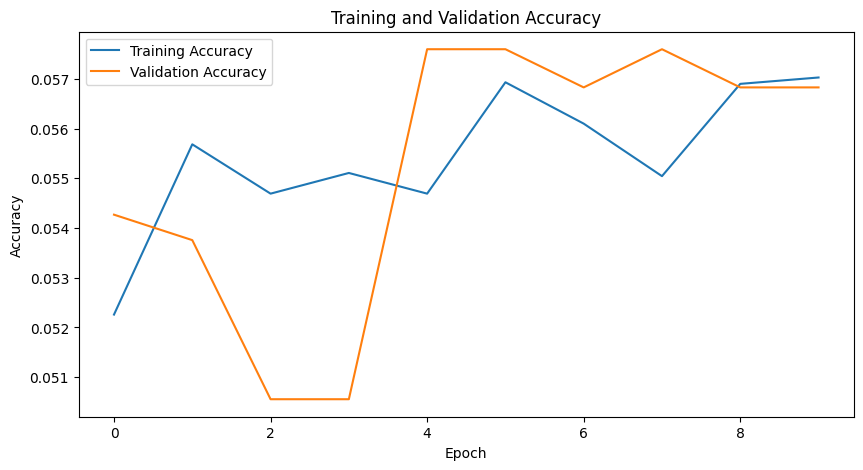

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


<i> Model seems to be underfitting since train and validation accuracies both are low and not impriving much </i>

# Model 2.0

## Changing model to address underfitting
* Regularization techniques (L2 regularization and dropout) have been added to the new model.
* L2 regularization is applied to the weights of each convolutional and fully connected layer.
* Dropout layers have been introduced after each convolutional layer and one of the fully connected layers.
* The dropout rate for the convolutional layers is set to 0.5, while for the fully connected layer, it is set to 0.2.
* The input shape of the first convolutional layer has been changed to accept grayscale images (input_shape=(48, 48, 1)).
* The number of channels in the input shape has been changed from 3 to 1 to accommodate grayscale image

In [23]:
# Define the CNN model
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# change no.1: additional convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers

# change 2: additional fully connected layer
model.add(layers.Dense(256, activation='relu'))  # Increase the number of units/neurons

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

## Training Model

In [24]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=10, batch_size=32)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(valid_images, valid_labels)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/10


ValueError: ignored

## Visualizing Training Metrics

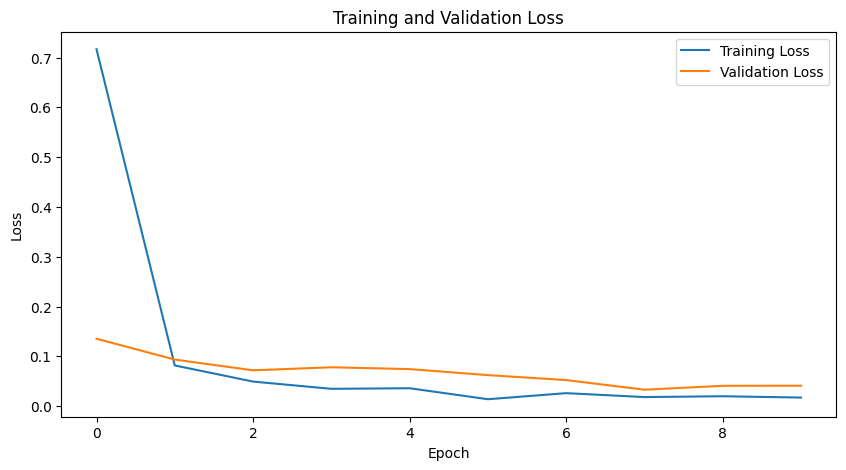

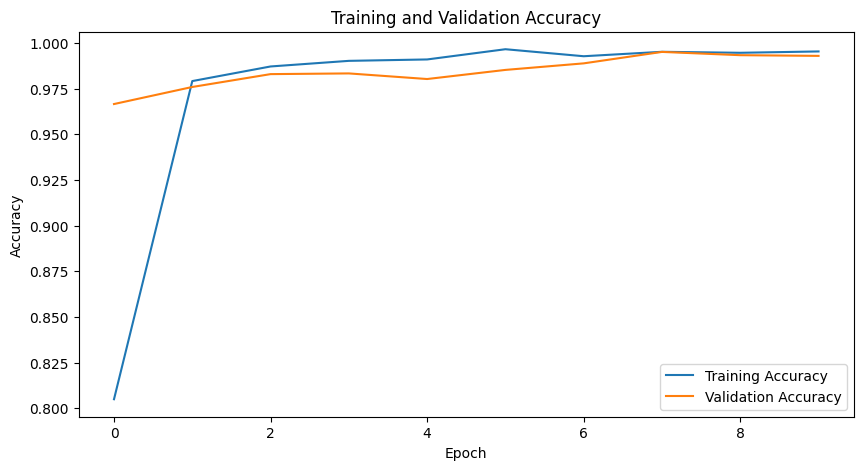

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## Save Model To Disk

In [ ]:
model.save('./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/model/model.h5')


# Modelling 3.0
* Using PIL for cropping instead of cv2

### Cropping

In [10]:
import os
import pandas as pd
from PIL import Image

In [11]:
# Create the directory to store the cropped images
cropped_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped_PIL"
os.makedirs(cropped_images_folder_path, exist_ok=True)

for class_id in range(0, 43):
    print(f"> Cropping images for class {class_id}.")
    folder_path = f"{cropped_images_folder_path}/{class_id:05}"
    os.makedirs(f"{folder_path}", exist_ok=True) # Create a new directory for the cropped images
    original_folder_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images/{class_id:05}"
    
    csv_content = pd.read_csv(f"{original_folder_path}/GT-{class_id:05}.csv", delimiter=";")  # Load annotation information

    for file_name in os.listdir(original_folder_path):
        if file_name.endswith(".ppm"):
            row = csv_content.loc[csv_content['Filename'] == file_name]
            filename, width, height, x1, y1, x2, y2, class_id = row.values[0]

            image = Image.open(os.path.join(original_folder_path, file_name))  # load image

            # crop image
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cropped_image = image.crop((x1, y1, x2, y2))

            # Save cropped image to the new directory
            cropped_image.save(os.path.join(f"{folder_path}", file_name))

print("Done cropping images!")

> Cropping images for class 0.
> Cropping images for class 1.
> Cropping images for class 2.
> Cropping images for class 3.
> Cropping images for class 4.
> Cropping images for class 5.
> Cropping images for class 6.
> Cropping images for class 7.
> Cropping images for class 8.
> Cropping images for class 9.
> Cropping images for class 10.
> Cropping images for class 11.
> Cropping images for class 12.
> Cropping images for class 13.
> Cropping images for class 14.
> Cropping images for class 15.
> Cropping images for class 16.
> Cropping images for class 17.
> Cropping images for class 18.
> Cropping images for class 19.
> Cropping images for class 20.
> Cropping images for class 21.
> Cropping images for class 22.
> Cropping images for class 23.
> Cropping images for class 24.
> Cropping images for class 25.
> Cropping images for class 26.
> Cropping images for class 27.
> Cropping images for class 28.
> Cropping images for class 29.
> Cropping images for class 30.
> Cropping images 

### Loading Images

In [14]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
# Define the path to the dataset directory
dataset_dir = './drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/GTSRB/Final_Training/Images_Cropped_PIL'

# Define empty lists to store the image data and corresponding labels
images = []
labels = []

# Load and resize dataset
print("Loading and resizing dataset")
for class_id in range(43):
    class_dir = os.path.join(dataset_dir, f'{class_id:05}')
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)

        # Convert image to grayscale
        image_gray = image.convert("L")

        # Resize the image to (48, 48)
        image_resized = image_gray.resize((48, 48))

        images.append(image_resized)
        labels.append(class_id)

    print(f"Class {class_id} images loaded and resized.")


Loading and resizing dataset
Class 0 images loaded and resized.
Class 1 images loaded and resized.
Class 2 images loaded and resized.
Class 3 images loaded and resized.
Class 4 images loaded and resized.
Class 5 images loaded and resized.
Class 6 images loaded and resized.
Class 7 images loaded and resized.
Class 8 images loaded and resized.
Class 9 images loaded and resized.
Class 10 images loaded and resized.
Class 11 images loaded and resized.
Class 12 images loaded and resized.
Class 13 images loaded and resized.
Class 14 images loaded and resized.
Class 15 images loaded and resized.
Class 16 images loaded and resized.
Class 17 images loaded and resized.
Class 18 images loaded and resized.
Class 19 images loaded and resized.
Class 20 images loaded and resized.
Class 21 images loaded and resized.
Class 22 images loaded and resized.
Class 23 images loaded and resized.
Class 24 images loaded and resized.
Class 25 images loaded and resized.
Class 26 images loaded and resized.
Class 27 

### Converting images from PIL objects to numeric form, normalizing ([0, 255] -> [0, 1]), and converting images and labels list to np array

In [16]:
import numpy as np

# Convert images to numpy arrays
images = np.array([np.array(img) for img in images])

# Normalize the pixel values
images = images / 255.0

labels = np.array(labels)

### Split data into training and testing sets

In [33]:
train_images, valid_images, train_labels, valid_labels = train_test_split(
    images, labels, train_size=0.8, stratify=labels, random_state=42
)

print(f"Number of train images: {len(train_images)}")
print(f"Number of train labels: {len(train_labels)}")
print(f"Number of valid images: {len(valid_images)}")
print(f"Number of valid labels: {len(valid_labels)}")

Number of train images: 31329
Number of train labels: 31329
Number of valid images: 7833
Number of valid labels: 7833


## One Hot Encoding

In [34]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=43)
valid_labels = to_categorical(valid_labels, num_classes=43)

In [35]:
train_images.shape, train_labels.shape, valid_images.shape, valid_labels.shape

((31329, 48, 48), (31329, 43), (7833, 48, 48), (7833, 43))

## Creating Model

Changes in the new model compared to the previous model:

* Input shape: The input shape of the first convolutional layer is changed to (48, 48, 1) to accommodate grayscale images instead of RGB images.

* Dropout layers: Dropout layers with a dropout rate of 0.5 are added after the first two convolutional layers to reduce overfitting. Another dropout layer with a dropout rate of 0.2 is added after the second fully connected layer.

* Summary: The model summary is updated to reflect the changes in the architecture, including the input shape and the additional dropout layers.

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [37]:

# Define the CNN model
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))  # Dropout layer for regularization

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))  # Dropout layer for regularization

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))  # Dropout layer for regularization

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(43, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 10, 10, 64)       

## Training Model

In [38]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=10, batch_size=32)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(valid_images, valid_labels)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/10
980/980 [==============================] - 155s 157ms/step - loss: 1.8991 - accuracy: 0.5476 - val_loss: 0.6319 - val_accuracy: 0.9092
Epoch 2/10
980/980 [==============================] - 145s 148ms/step - loss: 0.6752 - accuracy: 0.8957 - val_loss: 0.4485 - val_accuracy: 0.9645
Epoch 3/10
980/980 [==============================] - 150s 153ms/step - loss: 0.5455 - accuracy: 0.9317 - val_loss: 0.4199 - val_accuracy: 0.9759
Epoch 4/10
980/980 [==============================] - 147s 150ms/step - loss: 0.5022 - accuracy: 0.9433 - val_loss: 0.3645 - val_accuracy: 0.9814
Epoch 5/10
980/980 [==============================] - 144s 147ms/step - loss: 0.4520 - accuracy: 0.9510 - val_loss: 0.3425 - val_accuracy: 0.9851
Epoch 6/10
980/980 [==============================] - 147s 150ms/step - loss: 0.4299 - accuracy: 0.9535 - val_loss: 0.3393 - val_accuracy: 0.9837
Epoch 7/10
980/980 [==============================] - 147s 150ms/step - loss: 0.4065 - accuracy: 0.9571 - val_loss: 0.3184 -

## Visualizing Training Metrics

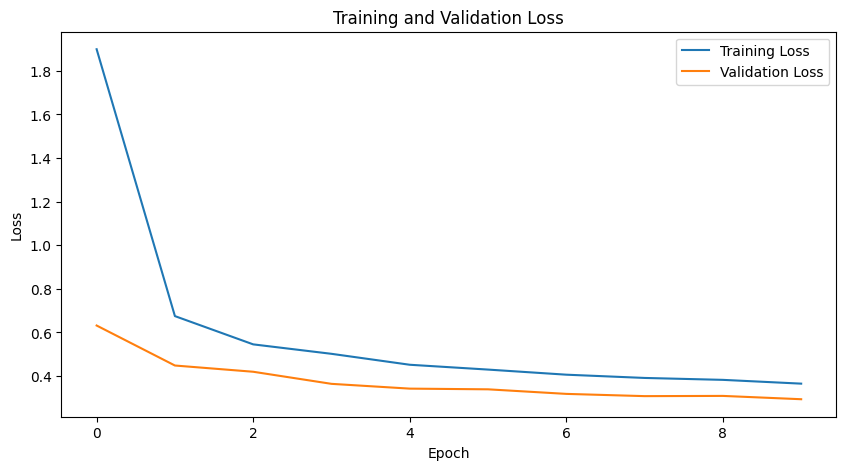

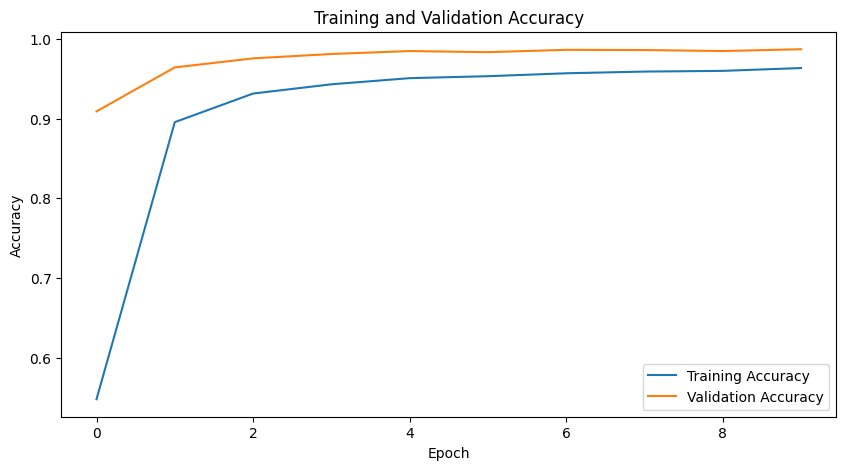

In [40]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [42]:
model.save('./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/model/model3.h5')